In [4]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
plt.rcParams["figure.figsize"] = (10,10)

## Defino el generador del ejercicio 1

In [2]:
SEED = np.floor((100680+101046+101018+100490) / 4)
def gen_lin_norm (n,seed,a,c,m):
    x = seed
    vector = []
    for i in range(n):
        x = ((a*x+c)%m)
        vector.append(x/m)
    return vector

## Test espectral en 2 dimensiones (tomo de a pares los numeros generados y analizo si hay o no patrones visibles)

In [3]:
nums = gen_lin_norm(1000000,SEED,1013904223,1664525,2**32)

## Ejercicio 8: 
### Aplicar un gap test al generador congruencial lineal implementado en el ejercicio 1 utilizando el intervalo [0,3 - 0,6].
### Analizar el resultado obtenido, e indicar si la distribución de probabilidades pasa o no el test.
### Considerar un nivel de significación del 1%.
### En caso que la distribución de probabilidades no pase el test con un nivel de significación del 1% volver a realizarlo con un nivel de significación del 5%.

In [23]:
contador = 0
frecuencias_gap_test = []
for i in range(len(nums)):
    if ((nums[i] >= 0.3) & (nums[i] <= 0.6)):
        frecuencias_gap_test.append(contador)
        contador = 0
    else:
        contador+=1

In [37]:
def obtener_frecuencias(val):
    frecuencias = []
    contador = 0
    for i in range(max(val) + 1):
        for j in val:
            if (j == i):
                contador += 1
        frecuencias.append(contador)
        contador = 0
    return frecuencias

#X es un numero natural
#P es la probabilidad de exito
def geometric_prob(x):
    p = 0.3
    probabilidad = ((1-p)**(x-1))*p
    return probabilidad

#val es el vector con cada valor obtenido por el generador aleatorio
#p_x es la funcion que da la probabilidad para cada x
def chisquare_test_geom(val): 
    estadistico = 0
    frecuencias = obtener_frecuencias(val)
    n = sum(frecuencias)
    for i in range(len(frecuencias)):
        estadistico += ((frecuencias[i]-n*geometric_prob(i))**2) / (n*geometric_prob(i))
    return estadistico

## Hallo estadistico con formula de la clase

In [40]:
estadistico_chi_2 = chisquare_test_geom(frecuencias_gap_test)
estadistico_chi_2

40389.71013892439

## Hallo estadistico con scipy

In [41]:
frecuencias_observadas = obtener_frecuencias(frecuencias_gap_test)
frecuencias_esperadas = []
for i in range(len(frecuencias_observadas)):
    frecuencias_esperadas.append(round(geometric_prob(i) * sum(frecuencias_observadas), 0))
chisquare(frecuencias_observadas, frecuencias_esperadas)

Power_divergenceResult(statistic=40388.566411779815, pvalue=0.0)

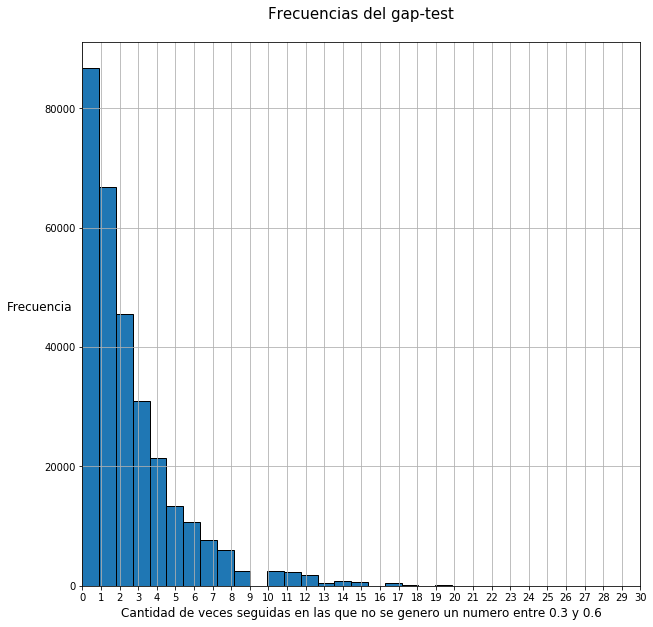

In [42]:
ticksx = []
for i in range(31):
    ticksx.append(i)
plt.hist(frecuencias_gap_test, edgecolor='k', bins=31)
plt.xlim(left=0)
plt.xticks(ticksx)
plt.title('Frecuencias del gap-test\n', fontsize=15)
plt.xlabel('Cantidad de veces seguidas en las que no se genero un numero entre 0.3 y 0.6', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12, rotation=0)
plt.grid();

# Debido a que el estadistico es altisimo (p-valor -> 0) pasa el test chi² y el gap test (En el histograma se ven que las frecuencias obtenidas en el test tienen la forma de una distribucion geometrica que era lo esperado)